In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
res = pd.read_csv("results.csv")
res

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
0,0,2b767_00000,0,12499.060638,bald,1,4.848535e+06
1,1,2b767_00000,1,12472.535659,bald,1,4.848535e+06
2,2,2b767_00000,2,12472.535659,bald,1,4.848535e+06
3,3,2b767_00000,3,12472.535150,bald,1,4.848535e+06
4,4,2b767_00000,4,12444.329960,bald,1,4.848535e+06
...,...,...,...,...,...,...,...
28827,28827,2b767_00034,896,2459.765459,random,5,5.166459e+06
28828,28828,2b767_00034,897,2459.859885,random,5,5.166459e+06
28829,28829,2b767_00034,898,2446.650356,random,5,5.166459e+06
28830,28830,2b767_00034,899,2446.649730,random,5,5.166459e+06


In [3]:
res[res.strategy=="random"]

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
24327,24327,2b767_00030,0,12499.060638,random,1,5.610504e+06
24328,24328,2b767_00030,1,12460.471361,random,1,5.610504e+06
24329,24329,2b767_00030,2,12375.823145,random,1,5.610504e+06
24330,24330,2b767_00030,3,12351.572210,random,1,5.610504e+06
24331,24331,2b767_00030,4,12295.658840,random,1,5.610504e+06
...,...,...,...,...,...,...,...
28827,28827,2b767_00034,896,2459.765459,random,5,5.166459e+06
28828,28828,2b767_00034,897,2459.859885,random,5,5.166459e+06
28829,28829,2b767_00034,898,2446.650356,random,5,5.166459e+06
28830,28830,2b767_00034,899,2446.649730,random,5,5.166459e+06


In [4]:
def format_scientific_tight(value):
    """
    Formats a number using scientific notation without the + sign.
    """
    return f"{value:.1e}".replace('e+0', 'e').replace('e+', 'e')

In [5]:
aucs = res.drop_duplicates(subset=["strategy","seed"])
agg = aucs.groupby("strategy")["score"]
mean_aucs, std_aucs = agg.mean(), agg.std()
aucs = pd.concat((mean_aucs, std_aucs), axis=1)
aucs.columns = ["avg", "stdv"]
aucs["score"] = aucs.apply(lambda row: f"{format_scientific_tight(row.avg)} ± {format_scientific_tight(row.stdv)}"  ,axis=1)
label_to_auc = dict(zip(aucs.index, aucs["score"]))

/var/folders/02/fbyrwz_s7tg4vmbm1kswhxp40000gp/T/ipykernel_38799/609964943.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([int(label) + 100 for label in current_xticks])


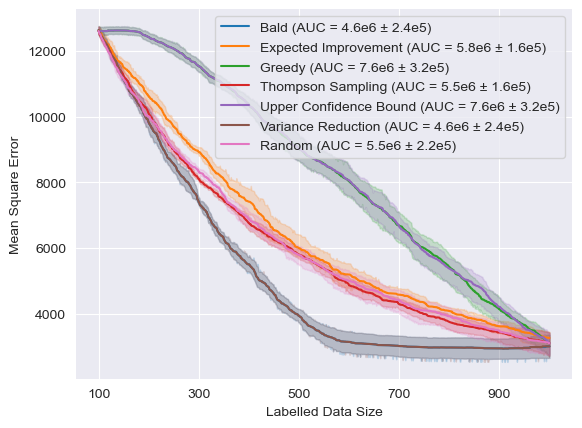

In [6]:
sns.set_style("darkgrid")

sns.lineplot(data=res, x="iteration", y="test_metric", hue="strategy")
plt.ylabel("Mean Square Error")
plt.xlabel("Labelled Data Size")

current_xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels([int(label) + 100 for label in current_xticks])

ax = plt.gca()
legend = ax.get_legend()
for text in legend.get_texts():
    label = text.get_text()
    new_label = f"{label.replace('_', ' ').title()} (AUC = {label_to_auc[label]})"
    text.set_text(new_label)
legend.set_title(None) 
    

for spine in ax.spines.values():
    spine.set_visible(False)